<a href="https://colab.research.google.com/github/Mgobeaalcoba/Exploration_Data_Analyst/blob/main/19_TSA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

*Análisis de Series de Tiempo (TSA)*

Obtendremos la información de la siguiente página : https://www.quandl.com/

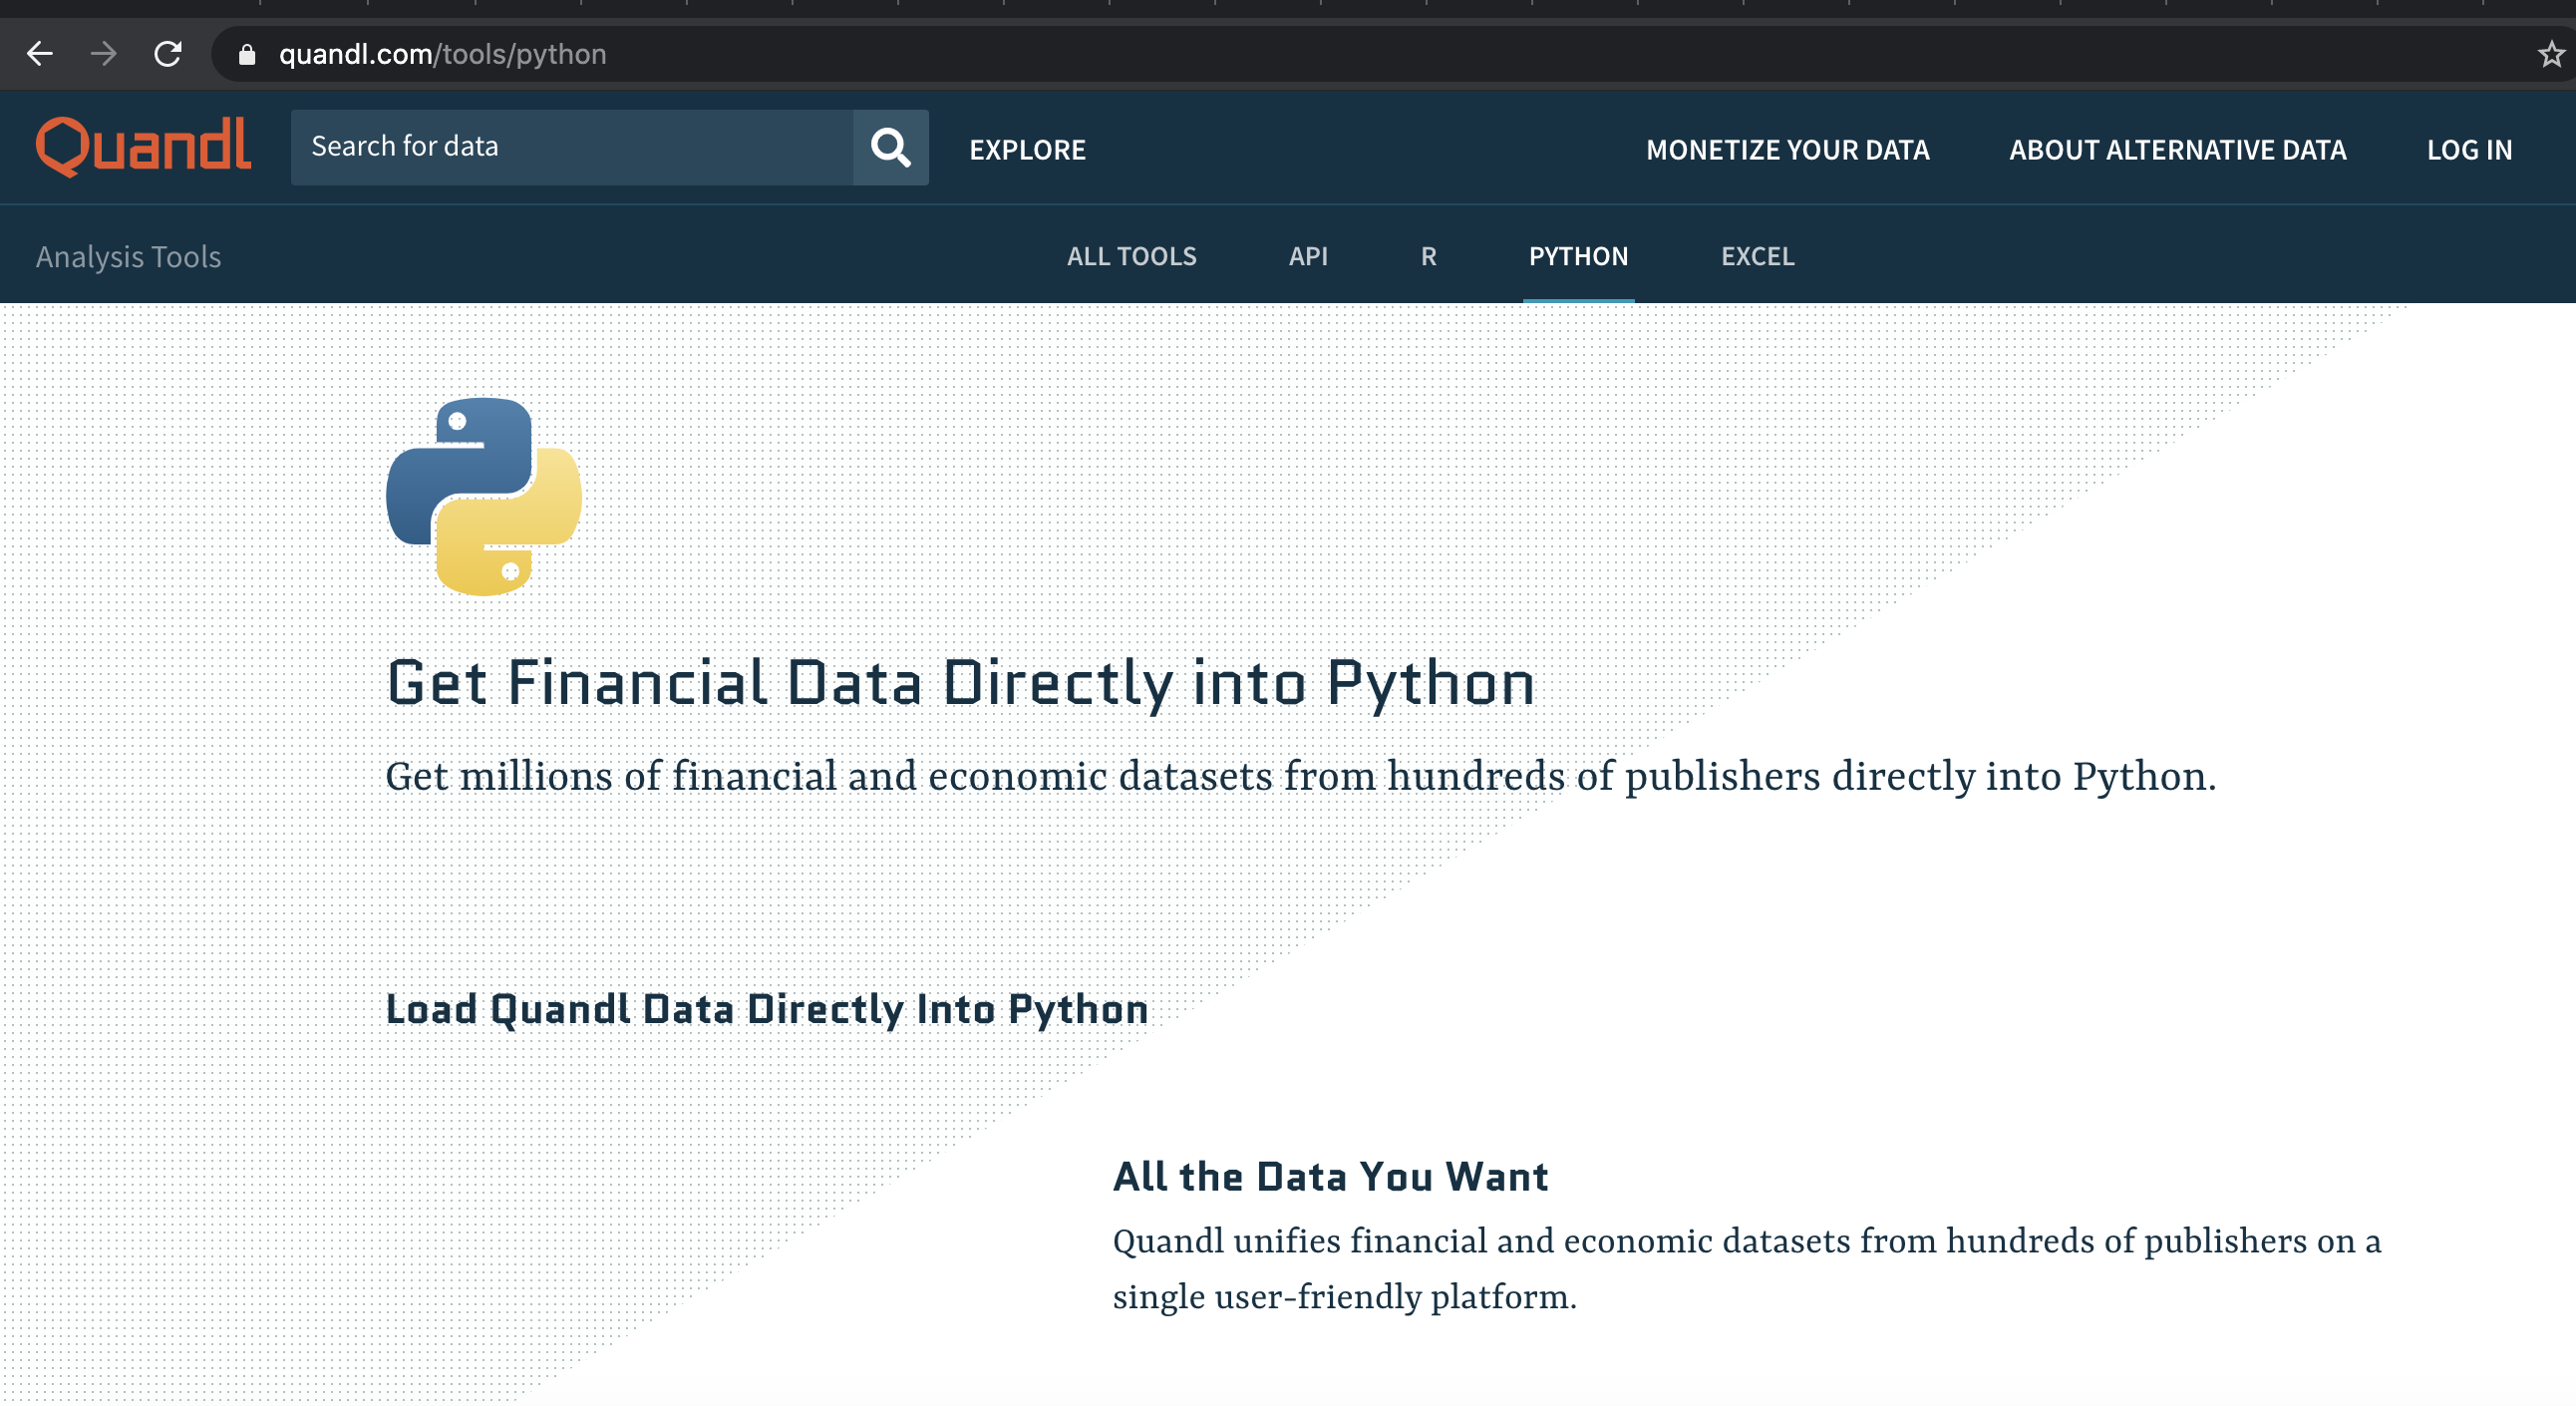

In [3]:
!pip install quandl

In [4]:
import quandl
QUANDL_API_KEY = '4sLKuvo8LszEsAF1Kqgr'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [5]:
mydata = quandl.get("FRED/GDP")

mydata # Es muy importante tener las fechas como indice para hace Análisis de series de tiempo. 

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


In [6]:
df = quandl.get('CHRIS/CME_GC1', column_index=6, collapse='weakly', start_date='2010-01-01') 
# Con get de quandl obtengo los datasets que me interesa trabajar. En este caso solo quiero la columna 6 del dataset CHRIS/CME_GC1
# con collapse le indico que tipo de agrupamiento quiero para los datos de tiempo. En este caso semanal. Y con start_date selecciono
# desde cuando me interesa recoger los datos. 

df

,Settle
Date,
2010-01-04,1118.3
2010-01-06,1136.5
2010-01-07,1133.7
2010-01-08,1138.9
2010-01-11,1151.4
...,...
2021-06-23,1782.3
2021-06-24,1775.6
2021-06-25,1776.6


In [8]:
df.resample('MS').ffill().dropna() # re agrupo mis datos por mes con el metodo .resample()

,Settle
Date,
2010-02-01,1104.3
2010-03-01,1118.3
2010-04-01,1125.1
2010-05-01,1180.7
2010-06-01,1224.8
...,...
2021-02-01,1866.0
2021-03-01,1725.8
2021-04-01,1728.4


In [10]:
df_settle = df.resample('MS').ffill().dropna() # Guardo mi re agrupamiento por mes y elimino los datos faltantes
df_settle

,Settle
Date,
2010-02-01,1104.3
2010-03-01,1118.3
2010-04-01,1125.1
2010-05-01,1180.7
2010-06-01,1224.8
...,...
2021-02-01,1866.0
2021-03-01,1725.8
2021-04-01,1728.4


In [11]:
df_rolling = df_settle.rolling(10) #ventana dinámica. Sirve para agrupar nuestra unidad de tiempo la cantidad de veces que le indiquemos
df_mean = df_rolling.mean() #media  
df_std = df_rolling.std() # desviación estándar


In [12]:
import matplotlib.pyplot as plt

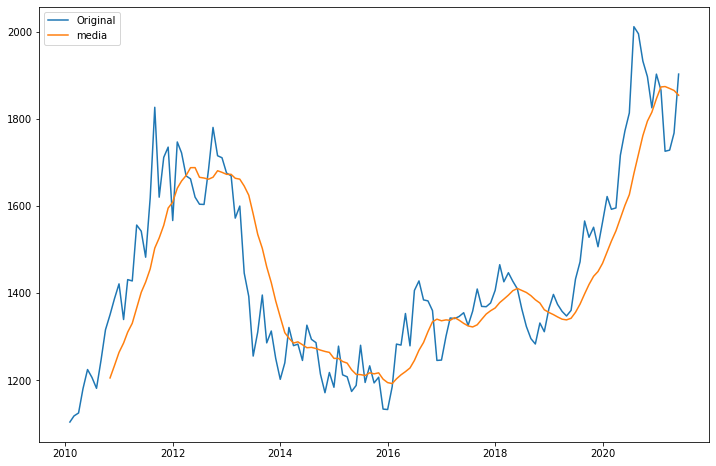

In [13]:
  plt.figure(figsize=(12, 8))
  plt.plot(df_settle, label='Original')
  plt.plot(df_mean, label='media')
  plt.legend()

In [14]:
#descomposición 
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
decompose_result = seasonal_decompose(df.dropna(), freq=12) #  12 es el número de periodos 
df_trend = decompose_result.trend 
df_season = decompose_result.seasonal
df_residual = decompose_result.resid



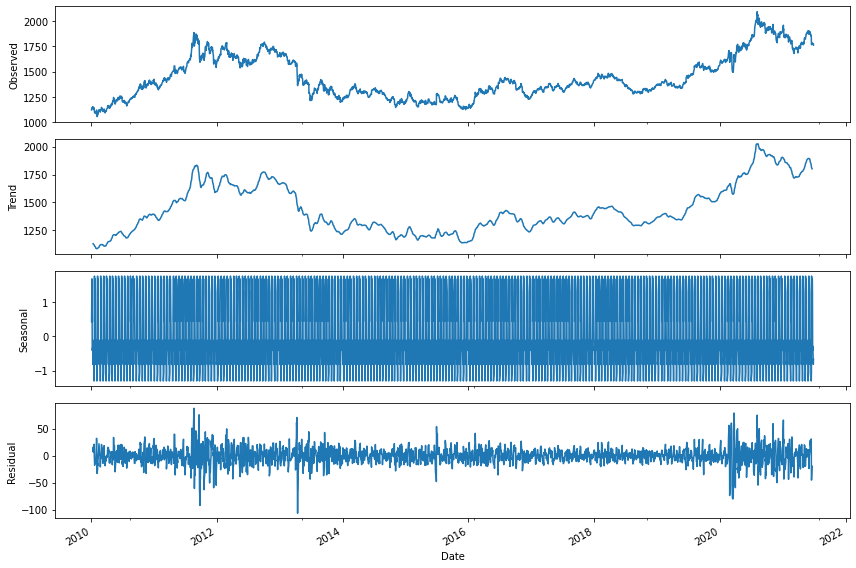

In [16]:
plt.rcParams['figure.figsize'] = (12, 8)
fig = decompose_result.plot()

SARIMAX - Predicción de los valores futuros 


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
#determinar si es estacionaria Dickey-Fuller Test

result = adfuller(df['Settle'])


In [ ]:

print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

p-value: 0.675682451403725
Critical Values:
	1%: -3.4327414664215854
	5%: -2.862596577381869
	10%: -2.5673324502397423


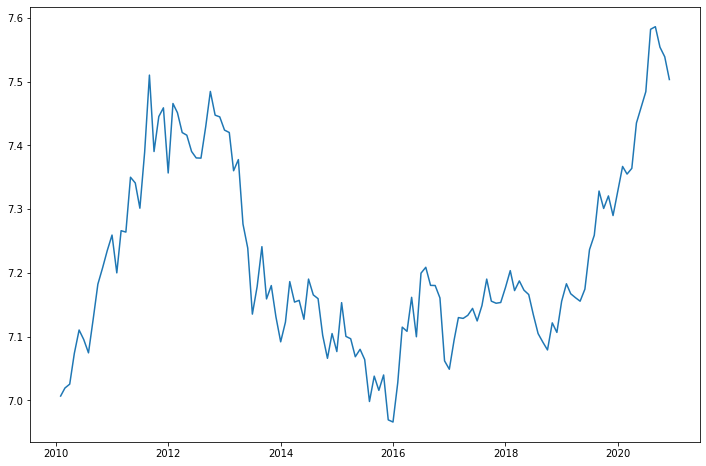

In [ ]:
df_log = np.log(df_settle)
plt.plot(df_log)

In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_mean = df_log - rolling_mean
df_mean.dropna(inplace=True)